In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from algorithms.rl import RL
from examples.test_env import TestEnv
import gym
      
#from bettermdptools.algorithms.planner import Planner
from examples.plots import Plots
from gym.envs.toy_text.frozen_lake import generate_random_map


In [2]:
import os
import warnings

import gym
import pygame
from algorithms.rl import RL
from algorithms.planner import Planner
from examples.test_env import TestEnv
import pickle


class Blackjack:
    def __init__(self):
        self._env = gym.make('Blackjack-v1', render_mode=None)
        # Explanation of convert_state_obs lambda:
        # def function(state, done):
        # 	if done:
		#         return -1
        #     else:
        #         if state[2]:
        #             int(f"{state[0]+6}{(state[1]-2)%10}")
        #         else:
        #             int(f"{state[0]-4}{(state[1]-2)%10}")
        self._convert_state_obs = lambda state, done: (
            -1 if done else int(f"{state[0] + 6}{(state[1] - 2) % 10}") if state[2] else int(
                f"{state[0] - 4}{(state[1] - 2) % 10}"))
        # Transitions and rewards matrix from: https://github.com/rhalbersma/gym-blackjack-v1
        current_dir = r"/Users/baptistecarbillet/Documents/MachineLearning4/bettermdptools/examples" #os.path.dirname(__file__) 
        file_name = 'blackjack-envP.pickle'
        f = os.path.join(current_dir, file_name)
        
        try:
            self._P = pickle.load(open(f, "rb"))
        except IOError:
            print("Pickle load failed.  Check path", f)
        self._n_actions = self.env.action_space.n
        self._n_states = len(self._P)

    @property
    def n_actions(self):
        return self._n_actions

    @n_actions.setter
    def n_actions(self, n_actions):
        self._n_actions = n_actions

    @property
    def n_states(self):
        return self._n_states

    @n_states.setter
    def n_states(self, n_states):
        self._n_states = n_states

    @property
    def P(self):
        return self._P

    @P.setter
    def P(self, P):
        self._P = P

    @property
    def env(self):
        return self._env

    @env.setter
    def env(self, env):
        self._env = env

    @property
    def convert_state_obs(self):
        return self._convert_state_obs

    @convert_state_obs.setter
    def convert_state_obs(self, convert_state_obs):
        self._convert_state_obs = convert_state_obs

In [3]:
blackjack = Blackjack()

## VALUE ITERATION

In [34]:
V_vi,V_track_vi, pi_vi = {}, {}, {}
pi_track_vi = {}
time_per_iter_vi = {}

for gamma in [0.5,0.9,1]:
    V_vi[gamma], V_track_vi[gamma], pi_vi[gamma],pi_track_vi[gamma],time_per_iter_vi[gamma] = Planner(blackjack.P).value_iteration(n_iters=100000, gamma=gamma,theta = 1e-3)



runtime = 0.01 seconds
runtime = 0.01 seconds
runtime = 0.01 seconds


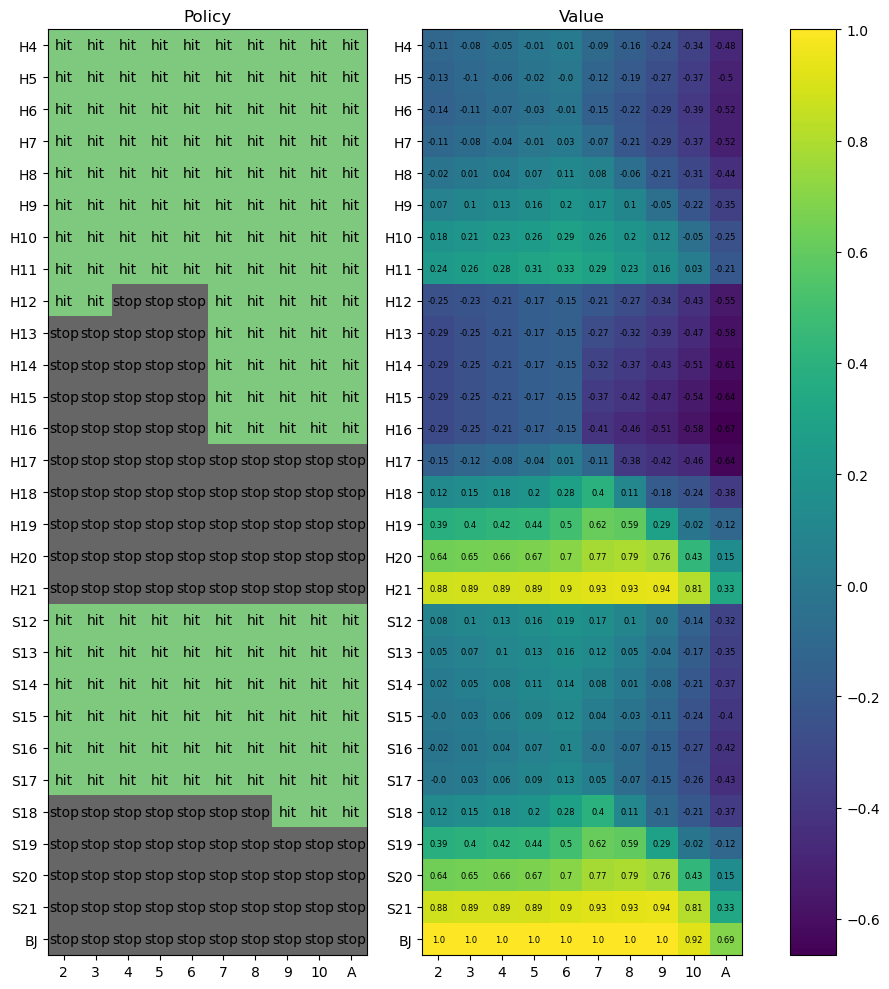

In [20]:
label_player = ["H{}".format(i) for i in range(4, 22)] + ["S{}".format(i) for i in range(12, 22)] + ["BJ"]
label_dealer = [str(i) for i in range(2,11)] + ["A"]
gamma = 1

states = {}
grid_policy = np.zeros((len(label_player), len(label_dealer)))
grid_value = np.zeros((len(label_player), len(label_dealer)))
for i in range(len(label_player)):
    for j in range(len(label_dealer)):
        grid_policy[i,j] = pi_vi[gamma](j + i*10)
        grid_value[i,j] = V_vi[gamma][j + i*10]
        states[j + i*10] = [label_player[i], label_dealer[j]]
        
        
fig, ax = plt.subplots(1,2,figsize=(10,10))
im = ax[0].imshow(grid_policy, cmap="Accent_r")

# We want to show all ticks...
ax[0].set_xticks(np.arange(len(label_dealer)))
ax[0].set_yticks(np.arange(len(label_player)))
# ... and label them with the respective list entries
ax[0].set_xticklabels(label_dealer)
ax[0].set_yticklabels(label_player)

im = ax[1].imshow(grid_value, cmap="viridis")

# We want to show all ticks...
ax[1].set_xticks(np.arange(len(label_dealer)))
ax[1].set_yticks(np.arange(len(label_player)))
# ... and label them with the respective list entries
ax[1].set_xticklabels(label_dealer)
ax[1].set_yticklabels(label_player)

#colorbar
ax[0].set_title("Policy")
ax[1].set_title("Value")
fig.tight_layout()



# Loop over data dimensions and create text annotations.
for i in range(len(label_player)):
    for j in range(len(label_dealer)):
        text = ax[0].text(j, i, "stop" if grid_policy[i, j] == 0 else "hit",
                       ha="center", va="center", color="black")
        
        text = ax[1].text(j, i, round(grid_value[i, j],2),
                       ha="center", va="center", color="black", fontsize=6)
        


#add colorbar
fig.colorbar(im, ax=ax.ravel().tolist())



plt.show()


    

In [6]:
for i in range(290):
    gamma1 = 1
    gamma2 = 0.9
    if pi_vi[gamma1](i) != pi_vi[gamma2](i):
        print(i)
        print("The optimal policy is defferent for this state :", states[i])
        print("For gamma = {}, the best choice is {}".format(gamma1,'stop' if pi_vi[gamma1](i) == 0 else 'hit'))
        print("For gamma = {}, the best choice is {}".format(gamma2,'stop' if pi_vi[gamma2](i) == 0 else 'hit'))
        

128
The optimal policy is defferent for this state : ['H16', '10']
For gamma = 1, the best choice is hit
For gamma = 0.9, the best choice is stop


## Policy interation

In [21]:
V_pi,V_track_pi, pi_pi = {}, {}, {}
pi_track_pi = {}
time_per_iter_pi = {}

for gamma in [0.5,0.9,1]:
    V_pi[gamma], V_track_pi[gamma], pi_pi[gamma],pi_track_pi[gamma],time_per_iter_pi[gamma] = Planner(blackjack.P).policy_iteration(n_iters=20, gamma=gamma,theta=1e-3)

/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/algorithms/planner.py:147: UserWarning: Max iterations reached before convergence.  Check n_iters.
  warnings.warn("Max iterations reached before convergence.  Check n_iters.")


runtime = 0.24 seconds
runtime = 0.24 seconds
runtime = 0.25 seconds


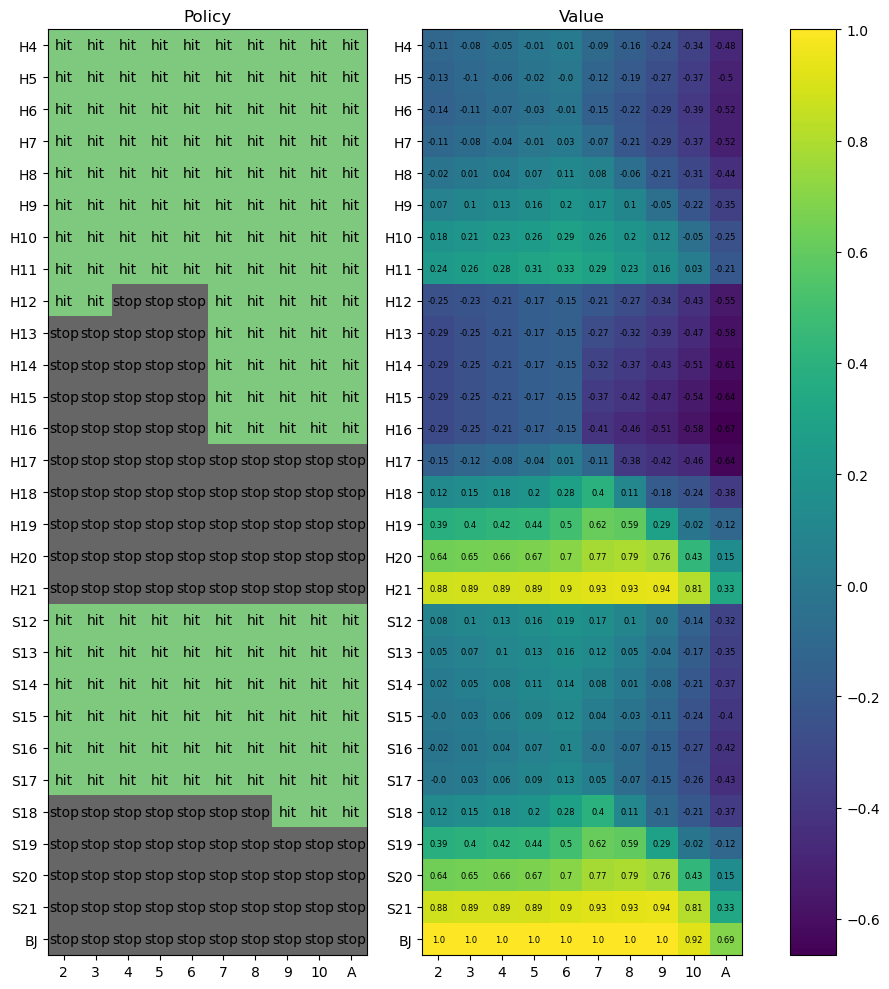

In [27]:
fig, ax = plt.subplots(len(gamma_list),2,figsize=(12, 18))


grid_policy = np.zeros((len(label_player), len(label_dealer)))
grid_value = np.zeros((len(label_player), len(label_dealer)))
for i in range(len(label_player)):
    for j in range(len(label_dealer)):
        grid_policy[i,j] = pi_pi[gamma](j + i*10)
        grid_value[i,j] = V_pi[gamma][j + i*10]
        states[j + i*10] = [label_player[i], label_dealer[j]]
        
        
fig, ax = plt.subplots(1,2,figsize=(10,10))
im = ax[0].imshow(grid_policy, cmap="Accent_r")

# We want to show all ticks...
ax[0].set_xticks(np.arange(len(label_dealer)))
ax[0].set_yticks(np.arange(len(label_player)))
# ... and label them with the respective list entries
ax[0].set_xticklabels(label_dealer)
ax[0].set_yticklabels(label_player)

im = ax[1].imshow(grid_value, cmap="viridis")

# We want to show all ticks...
ax[1].set_xticks(np.arange(len(label_dealer)))
ax[1].set_yticks(np.arange(len(label_player)))
# ... and label them with the respective list entries
ax[1].set_xticklabels(label_dealer)
ax[1].set_yticklabels(label_player)

#colorbar
ax[0].set_title("Policy")
ax[1].set_title("Value")
fig.tight_layout()



# Loop over data dimensions and create text annotations.
for i in range(len(label_player)):
    for j in range(len(label_dealer)):
        text = ax[0].text(j, i, "stop" if grid_policy[i, j] == 0 else "hit",
                       ha="center", va="center", color="black")
        
        text = ax[1].text(j, i, round(grid_value[i, j],2),
                       ha="center", va="center", color="black", fontsize=6)
        


#add colorbar
fig.colorbar(im, ax=ax.ravel().tolist())



plt.show()

In [22]:
for i in range(290):
    gamma1 = 1
    gamma2 = 0.9
    if pi_pi[gamma1](i) != pi_pi[gamma2](i):
        print(i)
        print("The optimal policy is defferent for this state :", states[i])
        print("For gamma = {}, the best choice is {}".format(gamma1,'stop' if pi_pi[gamma1](i) == 0 else 'hit'))
        print("For gamma = {}, the best choice is {}".format(gamma2,'stop' if pi_pi[gamma2](i) == 0 else 'hit'))

128
The optimal policy is defferent for this state : ['H16', '10']
For gamma = 1, the best choice is hit
For gamma = 0.9, the best choice is stop


In [23]:
for i in range(290):
    gamma1 = 0.5
   
    if pi_pi[gamma1](i) != pi_vi[gamma1](i):
        print(i)
        print("The optimal policy is defferent for this state :", states[i])
        print("For VI, the best choice is {}".format('stop' if pi_vi[gamma1](i) == 0 else 'hit'))
        print("For PI, the best choice is {}".format('stop' if pi_pi[gamma2](i) == 0 else 'hit'))

In [24]:
V_track_pi[1].shape

(19, 290)

## PLOT FOR VI AND PI

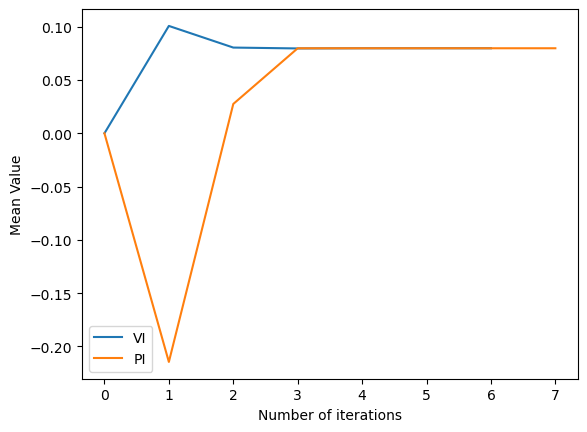

In [38]:
plt.plot(np.mean(V_track_vi[1][:8],axis=1),label = 'VI')
plt.plot(np.mean(V_track_pi[1][:8],axis = 1),label = 'PI')
plt.legend()
plt.xlabel('Number of iterations')
plt.ylabel('Mean Value')
plt.show()

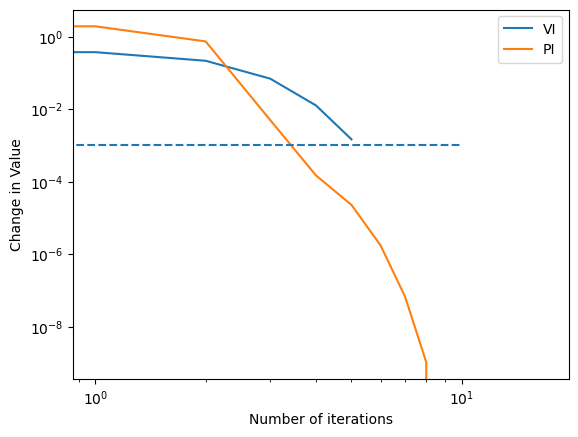

In [35]:
#plot change in V over time
V_change_pi = np.max(np.abs(V_track_pi[1][1:,:] - V_track_pi[1][:-1,:]),axis=1)
V_change_vi = np.max(np.abs(V_track_vi[1][1:,:] - V_track_vi[1][:-1,:]),axis=1)

plt.plot(V_change_vi,label = 'VI')
plt.plot(V_change_pi,label = 'PI')
plt.legend()
plt.xlabel('Number of iterations')
plt.ylabel('Change in Value')
plt.hlines(1e-3,0,10,linestyle = '--')
plt.xscale('log')
plt.yscale('log')
plt.show()

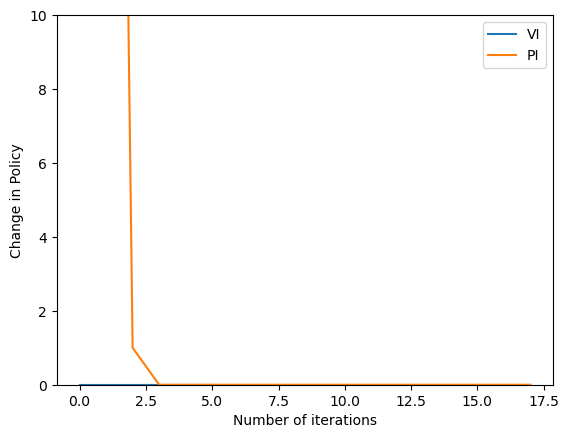

In [36]:
#Plot change in policy over time
def nChangesVi(p1,p2):
    res = 0
    for i in range(290):
        if p1(i) != p2(i):
            res += 1
    return res

def nChangesPi(p1,p2):
    res = 0
    for i in range(290):
        if p1[i] != p2[i]:
            res += 1
    return res
gamma = 1
nChanges_vi = [nChangesVi(pi_track_vi[gamma][i],pi_track_vi[gamma][i+1]) for i in range(len(pi_track_vi[gamma])-1)]
nChanges_pi = [nChangesPi(pi_track_pi[gamma][i],pi_track_pi[gamma][i+1]) for i in range(len(pi_track_pi[gamma])-1)]

plt.plot(nChanges_vi,label = 'VI')
plt.plot(nChanges_pi,label = 'PI')
plt.legend()
plt.xlabel('Number of iterations')
plt.ylabel('Change in Policy')
plt.ylim(0,10)
plt.show()
plt.show()

In [14]:
l = np.array([1,2,3,4])
np.cumsum(l)

array([ 1,  3,  6, 10])

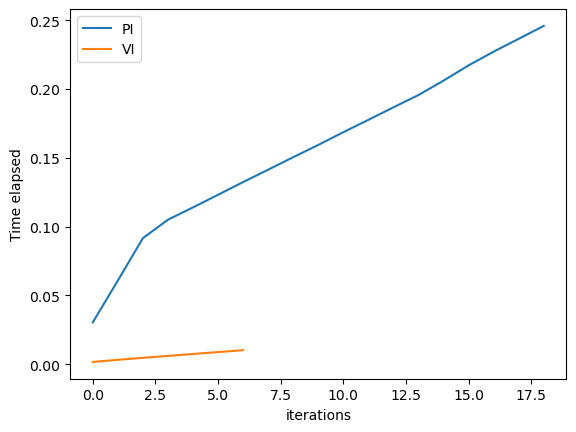

In [37]:
#plot time per iterations
gamma = 1
plt.plot(np.cumsum(time_per_iter_pi[gamma]),label = "PI")
plt.plot(np.cumsum(time_per_iter_vi[gamma]),label = "VI")
plt.legend()
plt.ylabel("Time elapsed")
plt.xlabel("iterations")
plt.show()

## Q-learning

In [72]:
Q_q, V_q, pi_q, Q_track_q, pi_track_q = {}, {}, {}, {}, {}

for min_epsilon in [0.9,0.5,0.3,0.1,0.01]:
    Q_q[min_epsilon], V_q[min_epsilon], pi_q[min_epsilon], Q_track_q[min_epsilon], pi_track_q[min_epsilon] = RL(blackjack.env).q_learning(nS=291, nA=2,convert_state_obs=blackjack.convert_state_obs,init_epsilon=1,min_epsilon=min_epsilon, n_episodes=1000000,gamma=1)


                                                                     

runtime = 40.82 seconds


runtime = 41.81 seconds


runtime = 42.65 seconds


runtime = 42.95 seconds


runtime = 43.18 seconds


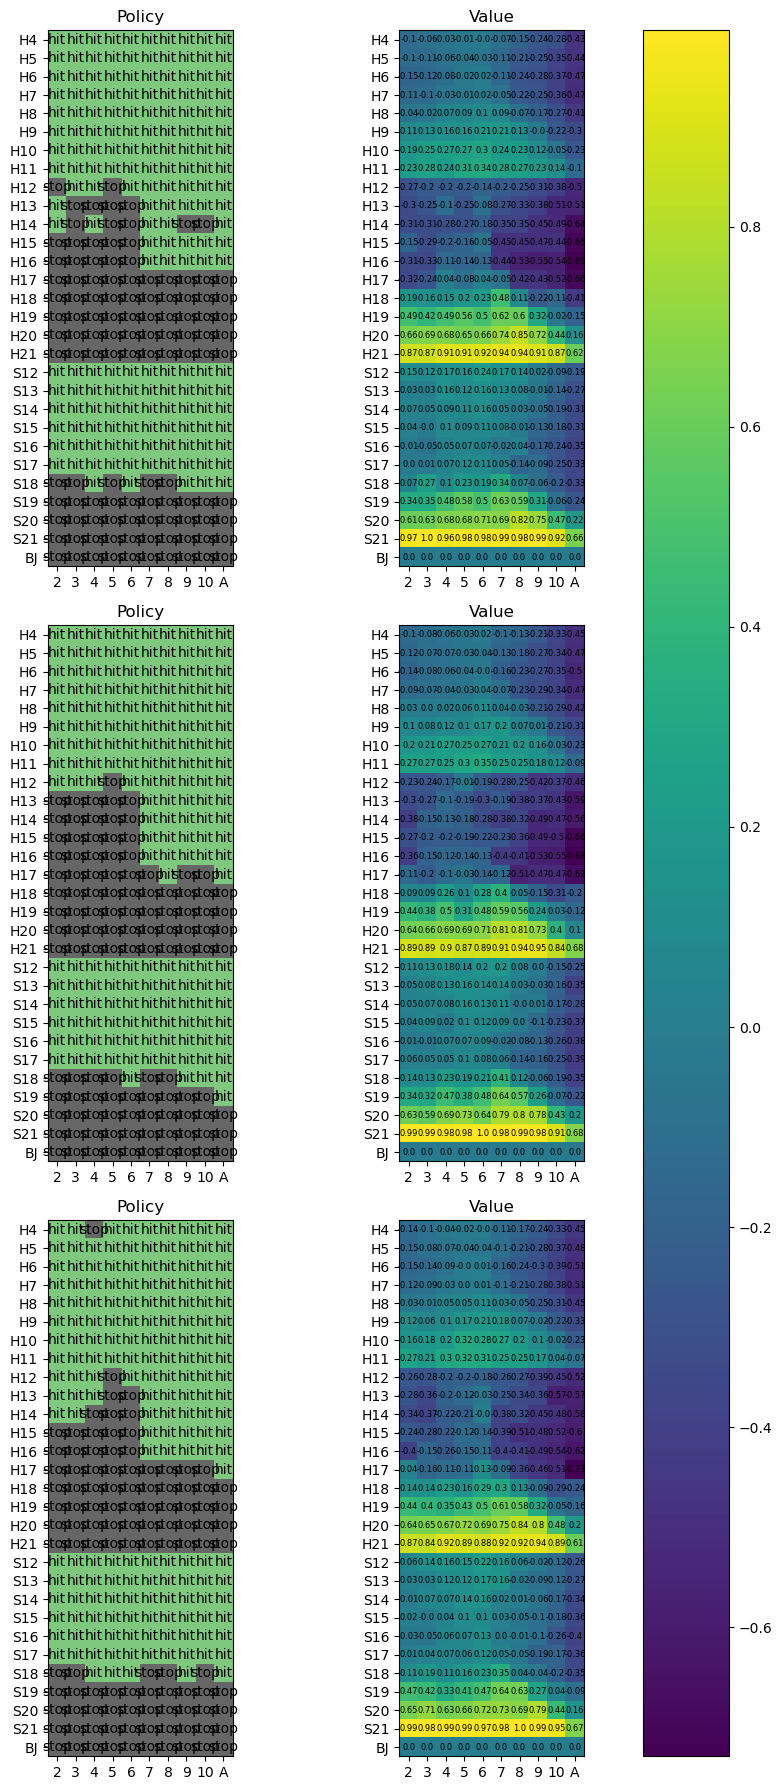

In [74]:
fig, ax = plt.subplots(3,2,figsize=(12, 18))
#[0.9,0.5,0.3,0.1,0.01]
for _,gamma in enumerate([0.9,0.5,0.1]):
    grid_policy = np.zeros((len(label_player), len(label_dealer)))
    grid_value = np.zeros((len(label_player), len(label_dealer)))
    for i in range(len(label_player)):
        for j in range(len(label_dealer)):
            grid_policy[i,j] = pi_q[gamma](j + i*10)
            grid_value[i,j] = V_q[gamma][j + i*10]
            states[j + i*10] = [label_player[i], label_dealer[j]]
            
            
    
    im = ax[(_,0)].imshow(grid_policy, cmap="Accent_r")

    # We want to show all ticks...
    ax[(_,0)].set_xticks(np.arange(len(label_dealer)))
    ax[(_,0)].set_yticks(np.arange(len(label_player)))
    # ... and label them with the respective list entries
    ax[(_,0)].set_xticklabels(label_dealer)
    ax[(_,0)].set_yticklabels(label_player)

    im = ax[(_,1)].imshow(grid_value, cmap="viridis")

    # We want to show all ticks...
    ax[(_,1)].set_xticks(np.arange(len(label_dealer)))
    ax[(_,1)].set_yticks(np.arange(len(label_player)))
    # ... and label them with the respective list entries
    ax[(_,1)].set_xticklabels(label_dealer)
    ax[(_,1)].set_yticklabels(label_player)

    #colorbar
    ax[(_,0)].set_title("Policy")
    ax[(_,1)].set_title("Value")
    fig.tight_layout()



    # Loop over data dimensions and create text annotations.
    for i in range(len(label_player)):
        for j in range(len(label_dealer)):
            text = ax[(_,0)].text(j, i, "stop" if grid_policy[i, j] == 0 else "hit",
                        ha="center", va="center", color="black")
            
            text = ax[(_,1)].text(j, i, round(grid_value[i, j],2),
                        ha="center", va="center", color="black", fontsize=6)
            


    #add colorbar
fig.colorbar(im, ax=ax.ravel().tolist())



plt.show()

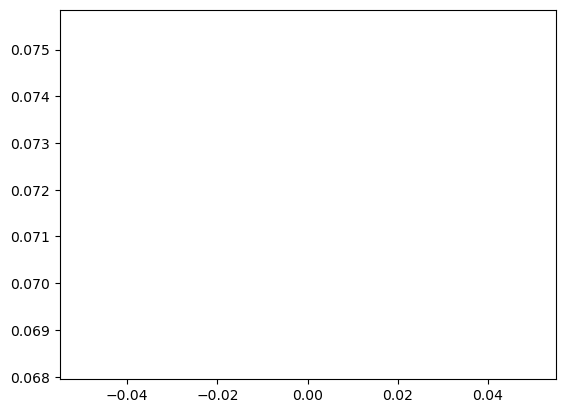

In [68]:
plt.plot(np.mean(V_q_track[0.5]))

In [67]:
V_q[0.01].shape

(291,)

In [109]:
for epsilon in [0.9,0.5,0.3,0.1,0.01]:
    r = 0
    for j in range(290):
        if pi_q[epsilon](j) != pi_vi[1](j):
            r+= 1
    print(r,epsilon) 
    

10 0.9
6 0.5
6 0.3
13 0.1
12 0.01


In [120]:
policy = pi_vi[1]
reward = 0
for i in range(10000):
    state = blackjack.env.reset()
    ind_state = blackjack.convert_state_obs(state[0],False)
    terminated = False
    while not terminated:
        next_state, r, terminated, truncated,_ = blackjack.env.step(policy(ind_state))
        ind_state = blackjack.convert_state_obs(next_state,False)
    
    reward += r

reward/10000

-0.037

In [119]:
policy = pi_pi[1]
reward = 0
for i in range(10000):
    state = blackjack.env.reset()
    ind_state = blackjack.convert_state_obs(state[0],False)
    terminated = False
    while not terminated:
        next_state, r, terminated, truncated,_ = blackjack.env.step(policy(ind_state))
        ind_state = blackjack.convert_state_obs(next_state,False)
    
    reward += r

reward/10000
        


-0.0401

In [77]:
policy = pi_q
reward = 0
for i in range(10000):
    state = blackjack.env.reset()
    ind_state = blackjack.convert_state_obs(state[0],False)
    terminated = False
    while not terminated:
        next_state, r, terminated, truncated,_ = blackjack.env.step(policy(ind_state))
        ind_state = blackjack.convert_state_obs(next_state,False)
    
    reward += r

reward/10000
        

TypeError: 'dict' object is not callable

In [90]:
reward_per_iter_q = {}
for epsilon in [0.3]:
    reward_per_iter_q[epsilon] = []
    for j in range(0,len(pi_track_q[epsilon]),1000):
        policy = pi_track_q[epsilon][j]
        reward = 0
        for i in range(1000):
            state = blackjack.env.reset()
            ind_state = blackjack.convert_state_obs(state[0],False)
            terminated = False
            while not terminated:
                next_state, r, terminated, truncated,_ = blackjack.env.step(policy[ind_state])
                ind_state = blackjack.convert_state_obs(next_state,False)
            
            reward += r
                

        reward_per_iter_q[epsilon].append(reward)


In [84]:
reward_per_iter_q

{0.9: [-26.0], 0.5: [-19.0]}

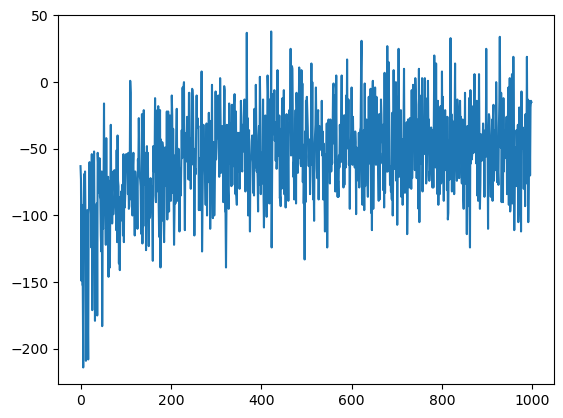

In [121]:
plt.plot(np.array(reward_per_iter_q[0.9][1:]))

In [52]:
next_state, reward, terminated, truncated, _ = blackjack.env.step(0)
next_state, reward, terminated, truncated, _


((8, 1, False), -1.0, True, False, {})

In [58]:
blackjack.env.reset()

((5, 10, False), {})

In [56]:
state = blackjack.env.reset()
state = blackjack.convert_state_obs(state[0],False)
blackjack.env.step(policy[state])

((19, 10, False), 0.0, False, False, {})

AttributeError: 'Axes' object has no attribute 'ravel'

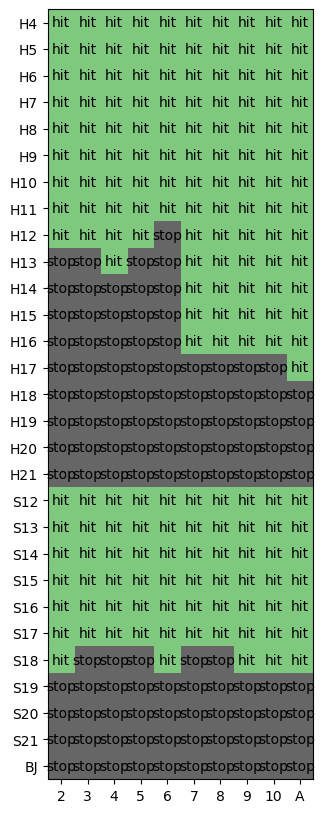

In [118]:
label_player = ["H{}".format(i) for i in range(4, 22)] + ["S{}".format(i) for i in range(12, 22)] + ["BJ"]
label_dealer = [str(i) for i in range(2,11)] + ["A"]
gamma = 1
epsilon = 0.3
states = {}
grid_policy = np.zeros((len(label_player), len(label_dealer)))
grid_value = np.zeros((len(label_player), len(label_dealer)))
for i in range(len(label_player)):
    for j in range(len(label_dealer)):
        grid_policy[i,j] = pi_q[epsilon](j + i*10)
        grid_value[i,j] = V_q[epsilon][j + i*10]
        states[j + i*10] = [label_player[i], label_dealer[j]]
        
        
fig, ax = plt.subplots(1,1,figsize=(5,10))
im = ax.imshow(grid_policy, cmap="Accent_r")

# We want to show all ticks...
ax.set_xticks(np.arange(len(label_dealer)))
ax.set_yticks(np.arange(len(label_player)))
# ... and label them with the respective list entries
ax.set_xticklabels(label_dealer)
ax.set_yticklabels(label_player)
'''
im = ax[1].imshow(grid_value, cmap="viridis")

# We want to show all ticks...
ax[1].set_xticks(np.arange(len(label_dealer)))
ax[1].set_yticks(np.arange(len(label_player)))
# ... and label them with the respective list entries
ax[1].set_xticklabels(label_dealer)
ax[1].set_yticklabels(label_player)

#colorbar
ax[0].set_title("Policy")
ax[1].set_title("Value")
fig.tight_layout()


'''
# Loop over data dimensions and create text annotations.
for i in range(len(label_player)):
    for j in range(len(label_dealer)):
        text = ax.text(j, i, "stop" if grid_policy[i, j] == 0 else "hit",
                       ha="center", va="center", color="black")
        
        #text = ax[1].text(j, i, round(grid_value[i, j],2),
                      # ha="center", va="center", color="black", fontsize=6)
        


#add colorbar
#fig.colorbar(im, ax=ax.ravel().tolist())



plt.show()

In [45]:
V_q[289]

0.0

In [183]:
blackjack.env.reset()

((21, 10, True), {})

In [134]:
blackjack.convert_state_obs(blackjack.env.reset()[0],False)

158

In [184]:
blackjack.env.step(0)

((21, 10, True), 1.0, True, False, {})

In [46]:
blackjack.P[289]

{0: [(0.3076923076923077, -1, 0.0, True), (0.6923076923076923, -1, 1.0, True)],
 1: [(0.07692307692307693, 89, 0.0, False),
  (0.07692307692307693, 99, 0.0, False),
  (0.07692307692307693, 109, 0.0, False),
  (0.07692307692307693, 119, 0.0, False),
  (0.07692307692307693, 129, 0.0, False),
  (0.07692307692307693, 139, 0.0, False),
  (0.07692307692307693, 149, 0.0, False),
  (0.07692307692307693, 159, 0.0, False),
  (0.07692307692307693, 169, 0.0, False),
  (0.3076923076923077, 179, 0.0, False)]}

In [12]:
t = RL(blackjack.env)
t.render = False
t.q_learning(nS=290, nA=2)

1


IndexError: index 6 is out of bounds for axis 1 with size 2

In [84]:
t.env.reset()

((21, 8, True), {})

In [62]:
blackjack.env.step(1)

((34, 10, False), -1.0, True, False, {})

In [21]:
blackjack.env.reset()

((21, 10, True), {})

In [ ]:
blackjack.P[150]

In [ ]:
blackjack.env.step(0)

In [ ]:
blackjack.env.__getstate__()

In [ ]:
!pip install box2d